In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import os
print(os.getcwd())

C:\Users\mkatebi\Desktop\test


In [3]:
data = pd.read_csv("C:\\Users\\mkatebi\\Desktop\\test\\Dataset.csv",encoding='latin1')

In [4]:
data.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [5]:
data.columns = ['DayOfWeek','Director','Genre','MovieTitle','ReleaseDate','Studio','AdjestedGrossMillion','BudgetMillion','GrossMillion','IMDBRating','MovieLensRating','OverseasMillion','OverseasPercentage','ProfitMillion','ProfitPercentage','RuntimeMinute','USMillion','GrossUSPercentage']

In [6]:
data.head()

,DayOfWeek,Director,Genre,MovieTitle,ReleaseDate,Studio,AdjestedGrossMillion,BudgetMillion,GrossMillion,IMDBRating,MovieLensRating,OverseasMillion,OverseasPercentage,ProfitMillion,ProfitPercentage,RuntimeMinute,USMillion,GrossUSPercentage
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
DayOfWeek               608 non-null object
Director                608 non-null object
Genre                   608 non-null object
MovieTitle              608 non-null object
ReleaseDate             608 non-null object
Studio                  608 non-null object
AdjestedGrossMillion    608 non-null object
BudgetMillion           608 non-null float64
GrossMillion            608 non-null object
IMDBRating              608 non-null float64
MovieLensRating         608 non-null float64
OverseasMillion         608 non-null object
OverseasPercentage      608 non-null float64
ProfitMillion           608 non-null object
ProfitPercentage        608 non-null float64
RuntimeMinute           608 non-null int64
USMillion               608 non-null float64
GrossUSPercentage       608 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 85.6+ KB


In [8]:
data.DayOfWeek = data.DayOfWeek.astype('category')
data.Director = data.Director.astype('category')
data.Genre = data.Genre.astype('category')
data.MovieTitle = data.MovieTitle.astype('category')
data.ReleaseDate = data.ReleaseDate.astype('category')
data.Studio = data.Studio.astype('category')
data.AdjestedGrossMillion = data.AdjestedGrossMillion.astype('category')
data.GrossMillion = data.GrossMillion.astype('category')
data.OverseasMillion = data.OverseasMillion.astype('category')
data.ProfitMillion = data.ProfitMillion.astype('category')

In [11]:
#sub_data = data[data.Genre.isin(genre_filters)]
sub_data = data
sub_data.Genre.unique()       

[action, comedy, adventure, horror, animation, ..., romance, fantasy, mystery, thriller, documentary]
Length: 15
Categories (15, object): [action, comedy, adventure, horror, ..., fantasy, mystery, thriller, documentary]

In [12]:
genre_filters = ['action','comedy','adventure','drama','animation']
genre_remove = [gen for gen in data.Genre if gen not in genre_filters]                                                          # list unique

In [13]:
set(genre_remove) 

{'biography',
 'crime',
 'documentary',
 'fantasy',
 'horror',
 'musical',
 'mystery',
 'romance',
 'sci-fi',
 'thriller'}

In [14]:
sub_data.Genre.cat.categories

Index(['action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'horror', 'musical', 'mystery',
       'romance', 'sci-fi', 'thriller'],
      dtype='object')

In [15]:
sub_data.Genre.cat.remove_categories(genre_remove,inplace=True)
sub_data.Genre.cat.categories

Index(['action', 'adventure', 'animation', 'comedy', 'drama'], dtype='object')

In [16]:
studio_filter = ['Buena Vista Studios','Fox','Paramount Pictures','Sony','Universal','WB']
studio_remove = [stdo for stdo in data.Studio if stdo not in studio_filter]
set(studio_remove)

{'Art House Studios',
 'Colombia Pictures',
 'Dimension Films',
 'Disney',
 'DreamWorks',
 'Fox Searchlight Pictures',
 'Gramercy Pictures',
 'IFC',
 'Lionsgate',
 'Lionsgate Films',
 'Lionsgate/Summit',
 'MGM',
 'MiraMax',
 'New Line Cinema',
 'New Market Films',
 'Orion',
 'Pacific Data/DreamWorks',
 'Path_ Distribution',
 'Relativity Media',
 'Revolution Studios',
 'Screen Gems',
 'Sony Picture Classics',
 'StudioCanal',
 'Summit Entertainment',
 'TriStar',
 'UA Entertainment',
 'USA',
 'Vestron Pictures',
 'WB/New Line',
 'Weinstein Company'}

In [17]:
sub_data.Studio.cat.remove_categories(studio_remove,inplace= True)

In [18]:
sub_data.Studio.cat.categories

Index(['Buena Vista Studios', 'Fox', 'Paramount Pictures', 'Sony', 'Universal',
       'WB'],
      dtype='object')

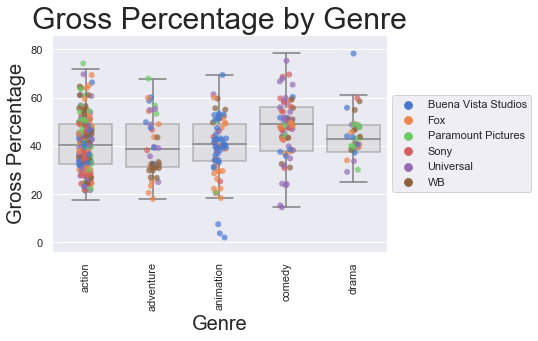

In [65]:
vis1= sns.boxplot(data= sub_data, x= sub_data.Genre, y= "GrossUSPercentage", orient= 'v', color= 'lightgray', fliersize=0)
sns.set(style='darkgrid',palette='muted',color_codes=True)
sns.stripplot(data= sub_data, x= sub_data.Genre, y= sub_data.GrossUSPercentage, jitter= True, size= 6, linewidth= 0, \
              hue= sub_data.Studio, alpha= 0.7)
plt.setp(vis1.artists, alpha= 0.5)
plt.title("Gross Percentage by Genre", fontsize= 30)
vis1.set_xlabel("Genre",fontsize= 20)
vis1.set_ylabel("Gross Percentage", fontsize= 20)
plt.xticks(rotation='vertical')
vis1.legend(bbox_to_anchor=(1,0.5), loc='center left')
plt.show()